## 타이타닉 생존자 예측
### 패키지 및 데이터 불러오기

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#데이터 불러오기
titanic = pd.read_csv('../dataset/titanic/train.csv')



### 데이터 확인

In [49]:
#train 데이터 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 데이터 정보 
#### train.csv / test.csv : 타이타닉 탑승자들 중 일부의 인적 정보와 생존 여부 데이터
- PassengerID : 탑승객 고유 아이디
- Survival : 탑승객 생존 유무 (0: 사망, 1: 생존)
- Pclass : 등실의 등급
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탐승한 형제자매, 아내, 남편의 수
- Parch : 함께 탐승한 부모, 자식의 수
- Ticket :티켓 번호
- Fare : 티켓의 요금
- Cabin : 객실번호
- Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton)


### 데이터 헤드 확인

In [50]:
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 결측치 처리

In [37]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Cabin'].fillna('N', inplace=True)
titanic['Embarked'].fillna('N', inplace=True)
titanic['Fare'].fillna(0, inplace=True)
#결측치 처리여부 확인
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 문자형 피처 범주형으로 변형
- Sex, Cabin, Embarked


In [38]:
#value.count()를 통한 분포 확인
print(titanic['Sex'].value_counts())
print()
print(titanic['Cabin'].value_counts())
print()
print(titanic['Embarked'].value_counts())


male      577
female    314
Name: Sex, dtype: int64

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [39]:
#객실번호의 경우 C~,B~이런 식으로 분류해야함
titanic['Cabin'] = titanic['Cabin'].str[:1]
titanic['Cabin'].value_counts()


N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

### 탐색적 데이터 분석
- 성별과 나이에 따른 생존확률

In [40]:
titanic.groupby(['Sex','Survived'])['Survived'].count()
### 여성의 생존률이 높았음을 확인

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='Survived'>

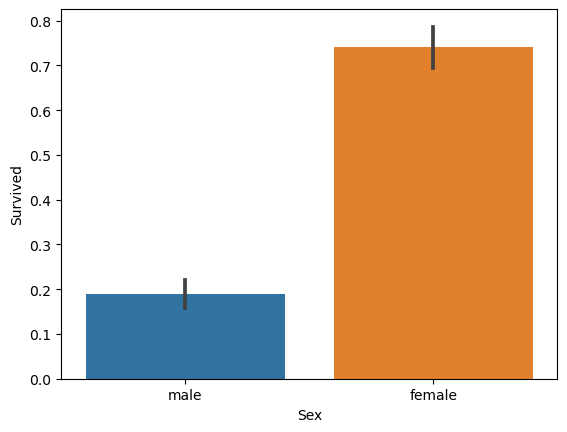

In [41]:
sns.barplot(data=titanic, x= 'Sex', y= 'Survived')
# 실제 데이터를 확인해보아도 여성의 생존률이 높았음을 확인할 수 있다.

### 등급을 감안한 생존률을 확인하자

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

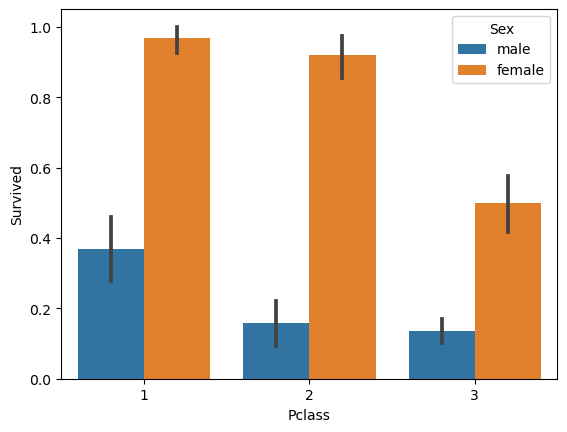

In [42]:
sns.barplot(data=titanic, x= 'Pclass', y= 'Survived',hue= 'Sex')
# 1, 2, 3클래스 별로 나타낸 모습을 확인할 수 있다.
# 여성의 생존 확률이 높았으

### 나이대에 따른 범주화
- 범주로 나누고 apply로 적용

In [43]:
def get_categorize(age):
    cate = ''
    if age <= -1: cate = 'Unknown'
    elif age <= 5: cate = 'Baby'
    elif age <= 12: cate = 'Child'
    elif age <= 18: cate = 'Teenager'
    elif age <= 25: cate = 'Student'
    elif age <= 35: cate = 'Young Adult'
    elif age <= 60: cate = 'Adult'
    else: cate = 'Elder'
    return cate

titanic['Age_cate'] = titanic['Age'].apply(lambda x: get_categorize(x))


<AxesSubplot: xlabel='Age_cate', ylabel='Survived'>

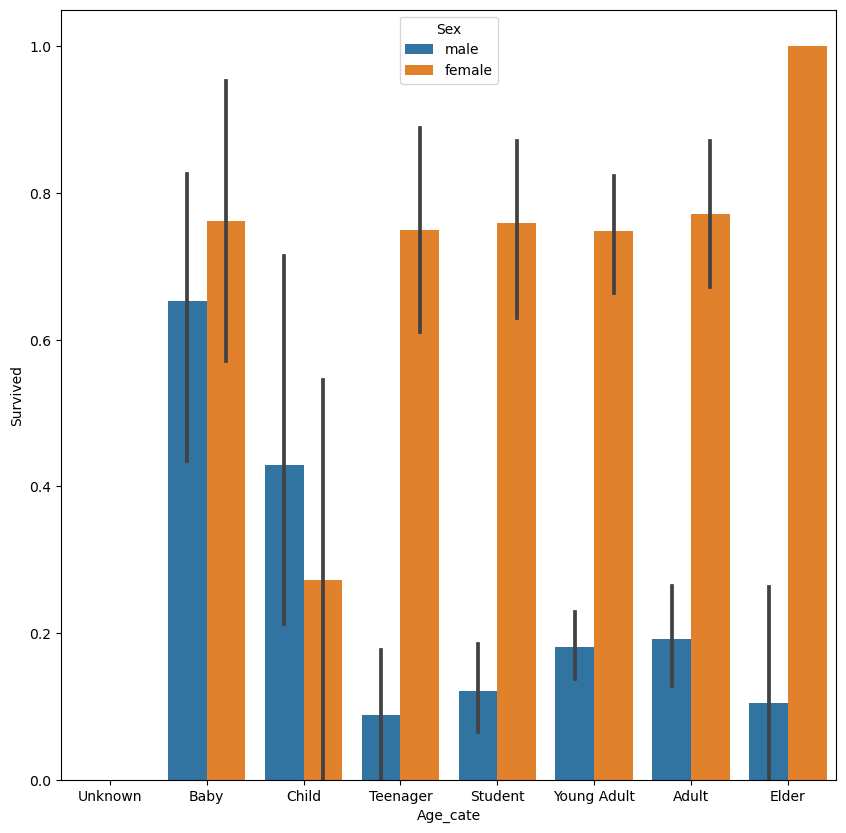

In [44]:
group_name = ['Unknown', 'Baby','Child', 'Teenager','Student','Young Adult','Adult', 'Elder']
ax = plt.figure(figsize=(10, 10))
sns.barplot(x=titanic.Age_cate, y=titanic.Survived, hue=titanic.Sex, order=group_name)
# 12살 이하 여자어린이의 생존율이 낮은 것을 확인

### 즉, 나이, 성별, 클래스가 주요한 변수임을 확인할 수 있음

### 남은 카테고리 인코딩
- Sex, Cabin, Embarked

In [47]:
from sklearn.preprocessing import LabelEncoder
def encode_feature(datadf):
    features = ['Sex', 'Cabin', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(datadf[feature])
        datadf[feature] = le.transform(datadf[feature])    
    return datadf
titanic = encode_feature(titanic)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cate
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


### 앞에서의 과정 + 불필요한 피쳐 제거
#### =>전처리 실행함수 구현

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#결측치 처리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    #결측치 처리여부 확인   
    print(f'결측치 확인 {df.isnull().sum().sum()}개')
    return df

#불필요한 피쳐 제거 PassengerId,Name,Ticket
def remove_unnecessary_data(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df
#범주형데이터 연속형으로 변환
def format_data(df):
    features = ['Pclass','Sex','Embarked','Cabin']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_data(df):
    df = fillna(df)
    df = remove_unnecessary_data(df)
    df['Cabin'] = df['Cabin'].str[:1]
    df = format_data(df)
    return df

#원본 재로딩 
titanic_df = pd.read_csv('../dataset/titanic/train.csv')
titanic_df = transform_data(titanic_df)
titanic_df.head()
#logistic을 위한 변환, Fare와 Age 변환
ss = StandardScaler()

#scale_data = ss.fit_transform(np.array(titanic_df[['Fare']]))
#scale_data = pd.DataFrame(scale_data, columns = ['Fare_scale'])
#titanic_df = pd.concat([titanic_df, pd.DataFrame(scale_data)], axis=1)
#titanic_df.head()
#logistic
X_titanic = titanic_df.drop(['Survived'], axis=1)
y_titanic = titanic_df['Survived']

# #하이퍼 파라미터 설정
param_grid = {'solver': ['liblinear', 'lbfgs'], 'C': [0.01, 0.1, 1,5, 10, 100],'penalty': ['l1', 'l2']}
X_train, X_test, y_train, y_test = train_test_split(X_titanic,y_titanic, test_size=0.2, random_state=30)

lr_clf = LogisticRegression()
grid_clf = GridSearchCV(lr_clf, param_grid = param_grid, cv = 5, return_train_score=True)
grid_clf.fit(X_train, y_train)
score_df = pd.DataFrame(grid_clf.cv_results_)
print(score_df.head())

print(f'최적 파라미터 {grid_clf.best_params_} , 최적 평균정확도:{grid_clf.best_score_}')
score_df[score_df['rank_test_score']==1]

결측치 확인 0개


c:\Users\dddf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dddf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.002502      0.000633         0.000902        0.000493    0.01   
1       0.000302      0.000603         0.000000        0.000000    0.01   
2       0.002326      0.002054         0.000389        0.000476    0.01   
3       0.011725      0.000468         0.001603        0.000492    0.01   
4       0.002503      0.000636         0.000601        0.000490     0.1   

  param_penalty param_solver  \
0            l1    liblinear   
1            l1        lbfgs   
2            l2    liblinear   
3            l2        lbfgs   
4            l1    liblinear   

                                              params  split0_test_score  \
0  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...           0.664336   
1    {'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}                NaN   
2  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...           0.713287   
3    {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}    

c:\Users\dddf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
15,0.011581,0.001446,0.001430,0.000760,5,l2,lbfgs,"{'C': 5, 'penalty': 'l2', 'solver': 'lbfgs'}",0.811189,0.776224,...,0.80199,0.013944,1,0.799649,0.813708,0.800000,0.803509,0.798246,0.803022,0.005617
20,0.003751,0.000489,0.000883,0.000488,100,l1,liblinear,"{'C': 100, 'penalty': 'l1', 'solver': 'libline...",0.811189,0.776224,...,0.80199,0.013944,1,0.794376,0.815466,0.801754,0.805263,0.798246,0.803021,0.007198
22,0.002619,0.000374,0.001014,0.000633,100,l2,liblinear,"{'C': 100, 'penalty': 'l2', 'solver': 'libline...",0.811189,0.776224,...,0.80199,0.013944,1,0.794376,0.817223,0.801754,0.805263,0.798246,0.803372,0.007814
23,0.013040,0.000880,0.001603,0.000374,100,l2,lbfgs,"{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}",0.811189,0.776224,...,0.80199,0.013944,1,0.794376,0.806678,0.800000,0.805263,0.798246,0.800913,0.004535
